Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(X)
design_matrix

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [6]:
from numpy import linalg

In [7]:
# Vaš kôd ovdje
design_matrix_t = np.transpose(design_matrix)
inverse = linalg.inv(design_matrix_t.dot(design_matrix))
w = inverse.dot(design_matrix_t).dot(y)

w_pseudoinverse = linalg.pinv(design_matrix).dot(y)

w, w_pseudoinverse




(array([2.2       , 0.45714286]), array([2.2       , 0.45714286]))

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

4.085714285714286
2.042857142857143


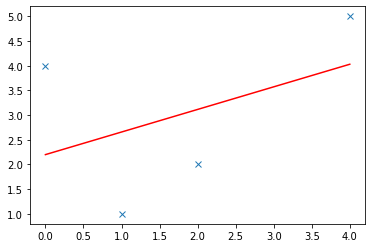

In [8]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error

h = design_matrix.dot(w)

plt.plot(X, y, 'x')
plt.plot(X, h, 'r-')

E = (1./2) * sum((y - h) ** 2)
print(E)
print(mean_squared_error(y, h))


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [9]:
# Vaš kôd ovdje
linalg.inv(design_matrix).dot(y)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Vaš kôd ovdje
reg = LinearRegression().fit(design_matrix, y)
print(reg.coef_)
print(reg.intercept_)

y_predict = reg.predict(design_matrix)

error = mean_squared_error(y, y_predict)
error

[0.         0.45714286]
2.2


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [12]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    return np.array([f(x) + np.random.normal(scale = noise) for x in X])
    

In [13]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

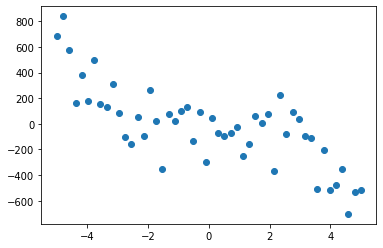

In [14]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

plt.scatter(x, y, marker = 'o')

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

24704.997098220996

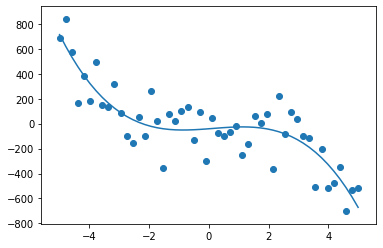

In [15]:
# Vaš kôd ovdje    
poly = PolynomialFeatures(3)
phi = poly.fit_transform(x)

w = linalg.pinv(phi).dot(y) 

h = np.dot(phi, w)

plt.plot(x, h)
plt.scatter(x, y, marker = 'o')
    
mean_squared_error(y, h)


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d = 1 , E = 40881.87907767264
d = 3 , E = 24704.997098220996
d = 5 , E = 24658.568127235518
d = 10 , E = 21301.956178647513
d = 20 , E = 17824.848726218348


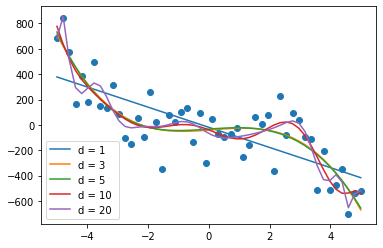

In [16]:
# Vaš kôd ovdje
plt.scatter(x, y, marker = 'o')

for d in [1, 3, 5, 10, 20]:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(x)
    w = linalg.pinv(phi).dot(y)
    h = np.dot(phi, w)
    error = mean_squared_error(y, h)
    print("d =", + d, ", E =", + error)
    plt.plot(x, h, label = "d = %d " %d )

plt.legend(loc="lower left")

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [17]:
from sklearn.model_selection import train_test_split

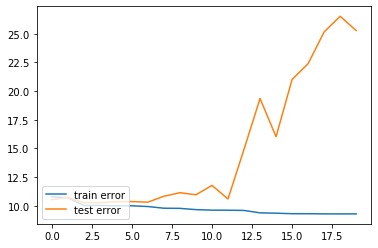

In [18]:
# Vaš kôd ovdje
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

train_error = []
test_error = []

def calculate_error(w, x, y):
    h = np.dot(poly.fit_transform(x), w)
    error = mean_squared_error(y, h)
    return error

for i in range(1,21):
    poly = PolynomialFeatures(i)
    phi = poly.fit_transform(x_train)
    w = linalg.pinv(phi).dot(y_train)
    
    train_error.append(calculate_error(w, x_train, y_train))
    test_error.append(calculate_error(w, x_test, y_test))

plt.plot(range(20), log(train_error), label = "train error")
plt.plot(range(20), log(test_error), label = "test error")
plt.legend(loc="lower left")

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

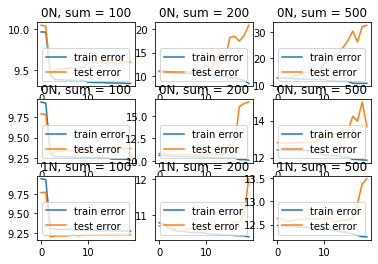

In [19]:
# Vaš kôd ovdje

x = make_instances(-5, 5, 1000)
x_train, x_test = train_test_split(x, test_size = 0.5)

x_train_100, x_train_to_split = train_test_split(x_train, test_size = 1/3)
x_train_200, x_train_500 = train_test_split(x_train_to_split, test_size = 0.5)

y_train_100 = make_labels(x_train_100, f, 100)
y_train_200 = make_labels(x_train_200, f, 200)
y_train_500 = make_labels(x_train_500, f, 500)

x_test_100, x_test_to_split = train_test_split(x_test, test_size = 1/3)
x_test_200, x_test_500 = train_test_split(x_test_to_split, test_size = 0.5)

y_test_100 = make_labels(x_test_100, f, 100)
y_test_200 = make_labels(x_test_200, f, 200)
y_test_500 = make_labels(x_test_500, f, 500)

global plot_number
plot_number = 0
for k in [1./3, 2./3, 1]:
    #sum = 100

    train_error = []
    test_error = []

    for i in range(1,21):
        poly = PolynomialFeatures(i)
        phi = poly.fit_transform(x_train_100[:int(k*len(x_train_100))])
        w = linalg.pinv(phi).dot(y_train_100[:int(k*len(y_train_100))])
    
        train_error.append(calculate_error(w, x_train_100[:int(k*len(x_train_100))], y_train_100[:int(k*len(y_train_100))] ))
        test_error.append(calculate_error(w, x_test_100[:int(k*len(x_test_100))], y_test_100[:int(k*len(y_test_100))]))

    plot_number += 1
    plt.subplot(3, 3, plot_number)
    plt.title("%dN, sum = 100" %k)
    plt.plot(range(20), log(train_error), label = "train error")
    plt.plot(range(20), log(test_error), label = "test error")
    plt.legend(loc="lower left")

    #sum = 200

    train_error = []
    test_error = []

    for i in range(1,21):
        poly = PolynomialFeatures(i)
        phi = poly.fit_transform(x_train_200[:int(k*len(x_train_200))])
        w = linalg.pinv(phi).dot(y_train_200[:int(k*len(y_train_200))])
    
        train_error.append(calculate_error(w, x_train_200[:int(k*len(x_train_200))], y_train_200[:int(k*len(y_train_200))] ))
        test_error.append(calculate_error(w, x_test_200[:int(k*len(x_test_200))], y_test_200[:int(k*len(y_test_200))]))
    
    plot_number += 1
    plt.subplot(3, 3, plot_number)
    plt.title("%dN, sum = 200" %k)
    plt.plot(range(20), log(train_error), label = "train error")
    plt.plot(range(20), log(test_error), label = "test error")
    plt.legend(loc="lower left")

    #sum = 500

    train_error = []
    test_error = []

    for i in range(1,21):
        poly = PolynomialFeatures(i)
        phi = poly.fit_transform(x_train_500[:int(k*len(x_train_500))])
        w = linalg.pinv(phi).dot(y_train_500[:int(k*len(y_train_500))])
    
        train_error.append(calculate_error(w, x_train_500[:int(k*len(x_train_500))], y_train_500[:int(k*len(y_train_500))] ))
        test_error.append(calculate_error(w, x_test_500[:int(k*len(x_test_500))], y_test_500[:int(k*len(y_test_500))]))
    
    plot_number += 1
    plt.subplot(3, 3, plot_number)
    plt.title("%dN, sum = 500" %k)
    plt.plot(range(20), log(train_error), label = "train error")
    plt.plot(range(20), log(test_error), label = "test error")
    plt.legend(loc="lower left")







***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [20]:
# Vaš kôd ovdje
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)
I = np.eye(4)
I[0][0] = 0

for reg in [0, 1, 10]:
    phi_t = np.transpose(phi)
    inverse = linalg.inv(phi_t.dot(phi) + reg * I)
    w = inverse.dot(phi_t).dot(y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [21]:
from sklearn.linear_model import Ridge

In [22]:
# Vaš kôd ovdje
for reg in [0, 1, 10]:
    clf = Ridge(alpha = reg)
    w = clf.fit(phi, y)
    print(w.coef_)
    print(w.intercept_)
    

[ 0.         -5.91666667  3.375      -0.45833333]
3.999999999999943
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471643
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229733


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

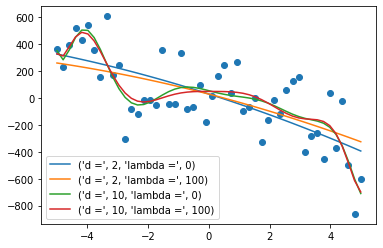

In [23]:
# Vaš kôd ovdje

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

plt.scatter(x, y, marker = 'o')

for d in [2, 10]:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(x)
    I = np.eye(d + 1)
    I[0][0] = 0
    for reg in [0, 100]:
        phi_t = np.transpose(phi)
        inverse = linalg.inv(phi_t.dot(phi) + reg * I)
        w = inverse.dot(phi_t).dot(y)
        h = phi.dot(w)
        label = "d =", +d, "lambda =", +reg
        plt.plot(x, h, label = label )

plt.legend(loc="lower left")
        
        

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


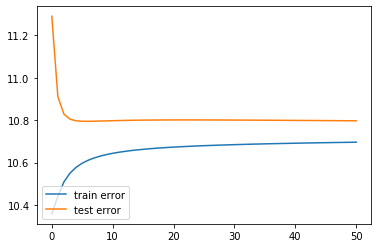

In [24]:
# Vaš kôd ovdje
def calculate_error(w, x, y):
    h = np.dot(poly.fit_transform(x), w)
    error = mean_squared_error(y, h)
    return error

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

train_error = []
test_error = []

poly = PolynomialFeatures(10)
phi = poly.fit_transform(x_train)
phi_t = np.transpose(phi)
I = np.eye(11)
I[0][0] = 0

for reg in range(0, 51):
    inverse = linalg.inv(phi_t.dot(phi) + reg * I)
    w = inverse.dot(phi_t).dot(y_train)
    
    train_error.append(calculate_error(w, x_train, y_train))
    test_error.append(calculate_error(w, x_test, y_test))

plt.plot(range(51), log(train_error), label = "train error")
plt.plot(range(51), log(test_error), label = "test error")
plt.legend(loc="lower left")


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [25]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

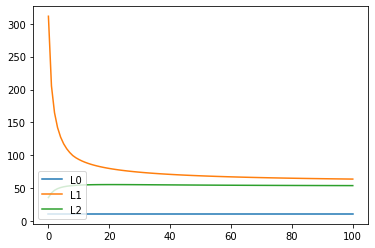

In [26]:
# Vaš kôd ovdje
x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

def calculate_L1(w):
    return sum(absolute(w))

def calculate_L2(w):
    return sum(w.dot(transpose(w)))**0.5

poly = PolynomialFeatures(10)
phi = poly.fit_transform(x_train)
phi_t = np.transpose(phi)
I = np.eye(11)
I[0][0] = 0

L0 = []
L1 = []
L2 = []

for reg in range(0, 101):
    inverse = linalg.inv(phi_t.dot(phi) + reg * I)
    w = inverse.dot(phi_t).dot(y_train)
    L0.append(nonzeroes(w))
    L1.append(calculate_L1(w))
    L2.append(calculate_L2(w))
    
    
plt.plot(range(101), L0, label = "L0")
plt.plot(range(101), L1, label = "L1")
plt.plot(range(101), L2, label = "L2")
plt.legend(loc="lower left")


Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

### (b)

C:\Users\barzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324649.62526090676, tolerance: 226.18969507999748
  positive)
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328279.0602671224, tolerance: 226.18969507999748
  positive)
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coord

C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404703.2247090008, tolerance: 226.18969507999748
  positive)
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404793.56456138456, tolerance: 226.18969507999748
  positive)
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404882.37869066605, tolerance: 226.18969507999748
  positive)
C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

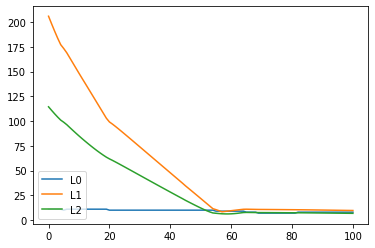

In [27]:
# Vaš kôd ovdje
# Vaš kôd ovdje
from sklearn import linear_model
x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

def calculate_L1(w):
    return sum(absolute(w))

def calculate_L2(w):
    return sum(w.dot(transpose(w)))**0.5
   
poly = PolynomialFeatures(10)
phi = poly.fit_transform(x_train)

L0 = []
L1 = []
L2 = []

for reg in range(0, 101):
    clf = linear_model.Lasso(alpha=reg).fit(phi, y_train)
    w = clf.coef_
    w0 = clf.intercept_
    w[0] = w0
    L0.append(nonzeroes(w))
    L1.append(calculate_L1(w))
    L2.append(calculate_L2(w))
    
    
plt.plot(range(101), L0, label = "L0")
plt.plot(range(101), L1, label = "L1")
plt.plot(range(101), L2, label = "L2")
plt.legend(loc="lower left")



### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [28]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0.5, 1.0, 'grade_in_highschol')

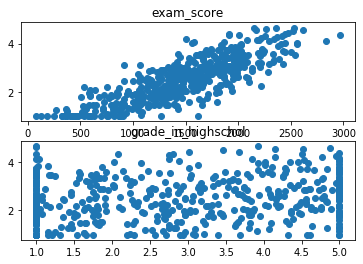

In [29]:
# Vaš kôd ovdje
subplot(2,1,1)
plt.scatter(exam_score, grades_y)
plt.title("exam_score")

subplot(2,1,2)
plt.scatter(grade_in_highschool, grades_y)
plt.title("grade_in_highschol")

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [30]:
# Vaš kôd ovdje
clf = Ridge(alpha = 0.01)
w = clf.fit(grades_X, grades_y)
print(w.coef_)
print(w.intercept_)



[0.00141497 0.09477276]
0.1506117957577615


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Vaš kôd ovdje
scalerx = StandardScaler()
grades_X_fixed = scalerx.fit_transform(grades_X)

scalery = StandardScaler()
grades_y_fixed = scalery.fit_transform(grades_y.reshape(-1, 1))

clf = Ridge(alpha = 0.01)
w = clf.fit(grades_X_fixed, grades_y_fixed)
print(w.coef_)
print(w.intercept_)

[[0.81630375 0.15167761]]
[8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [33]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.delete(np.append(grades_X_fixed, grades_X_fixed, 1), 2, 1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [34]:
# Vaš kôd ovdje
clf = Ridge(alpha = 0.01)
w = clf.fit(grades_X_fixed_colinear, grades_y_fixed)
print(w.coef_)
print(w.intercept_)





[[0.81630364 0.07583957 0.07583957]]
[8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [35]:
# Vaš kôd ovdje
from statistics import stdev

for reg in[0.01, 1000]:
    print("lambda = %f" %reg)
    w00 = []
    w1 = []
    w2 = []
   
    for i in range(10):
        x_train, x_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5)
        
        clf = Ridge(alpha = reg).fit(x_train, y_train)
        w0 = clf.intercept_
        w = clf.coef_
        w[0][0] = w0
        
        print("i = %d" %i)
        print(w)
    
        
        w00.append(w[0][0])
        w1.append(w[0][1])
        w2.append(w[0][2])

    
    print("w0, stdev = %f" %stdev(w00))
    print("w1, stdev = %f" %stdev(w1))
    print("w2, stdev = %f" %stdev(w2))
        
        
        



lambda = 0.010000
i = 0
[[-0.01045662  0.06504303  0.06504303]]
i = 1
[[0.02152062 0.0761075  0.0761075 ]]
i = 2
[[0.00921447 0.07673386 0.07673386]]
i = 3
[[-0.01820559  0.07483515  0.07483515]]
i = 4
[[0.01261939 0.08013669 0.08013669]]
i = 5
[[0.00283109 0.04525193 0.04525193]]
i = 6
[[-0.04553636  0.0614553   0.0614553 ]]
i = 7
[[0.00861207 0.06648337 0.06648337]]
i = 8
[[-0.01197704  0.04444567  0.04444567]]
i = 9
[[-0.01779144  0.07443972  0.07443972]]
w0, stdev = 0.019782
w1, stdev = 0.012828
w2, stdev = 0.012828
lambda = 1000.000000
i = 0
[[-0.03142131  0.02835895  0.02835895]]
i = 1
[[0.02571883 0.03291219 0.03291219]]
i = 2
[[0.06719543 0.02978618 0.02978618]]
i = 3
[[0.0028935  0.02672001 0.02672001]]
i = 4
[[-0.09062737  0.01854873  0.01854873]]
i = 5
[[0.10754806 0.0341431  0.0341431 ]]
i = 6
[[-0.00622437  0.02581807  0.02581807]]
i = 7
[[0.00176983 0.02425615 0.02425615]]
i = 8
[[0.07727794 0.03400781 0.03400781]]
i = 9
[[0.05092218 0.03173866 0.03173866]]
w0, stdev = 0.

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [36]:
# Vaš kôd ovdje
I = np.eye(4)
I[0][0] = 0

poly = PolynomialFeatures(1)
phi = poly.fit_transform(grades_X_fixed_colinear)

for reg in [0.01, 10]:
    cond_num = cond(transpose(phi).dot(phi) + reg*I)
    print(cond_num)

100542.8665348069
101.54186653499318


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  